In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as kl

### Data

In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img

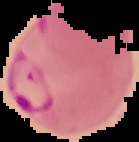

In [4]:
load_img("Malarial Cell Image Data\cell_images\Parasitized\C37BP2_thinF_IMG_20150620_133238a_cell_97.png")

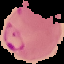

In [5]:
load_img("Malarial Cell Image Data\cell_images\Parasitized\C37BP2_thinF_IMG_20150620_133238a_cell_97.png", target_size=[64, 64])

In [7]:
os.environ["KERAS_BACKEND"] = "tensorflow"
np.random.seed(222)

In [30]:
img_dir = "Malarial Cell Image Data/malarial_cell_image_data/cell_images/"
size = 64
dataset = []
label = []

In [31]:
parasitized_img = os.listdir(img_dir+"Parasitized")
len(parasitized_img)

13780

In [32]:
for i, img in enumerate(parasitized_img):
    if(img.split(".")[1] == "png"):
        image = cv2.imread(img_dir+"Parasitized/"+img)
        image = Image.fromarray(image, "RGB")
        image = image.resize((size, size))
        dataset.append(np.array(image))
        label.append(0)

In [33]:
uninfected_img = os.listdir(img_dir+"Uninfected")
len(uninfected_img)

13780

In [34]:
for i, img in enumerate(uninfected_img):
    if(img.split(".")[1] == "png"):
        image = cv2.imread(img_dir+"Uninfected/"+img)
        image = Image.fromarray(image, "RGB")
        image = image.resize((size, size))
        dataset.append(np.array(image))
        label.append(1)

In [37]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=11)

### CNN Model Architecture

In [38]:
inp_shape = (size, size, 3)

inp = kl.Input(shape = inp_shape)

conv1 = kl.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "same")(inp)
pool1 = kl.MaxPool2D(pool_size=(2,2))(conv1)
norm1 = kl.BatchNormalization(axis = -1)(pool1)
drop1 = kl.Dropout(rate = 0.2)(norm1)

conv2 = kl.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "same")(drop1)
pool2 = kl.MaxPool2D(pool_size=(2,2))(conv2)
norm2 = kl.BatchNormalization(axis = -1)(pool2)
drop2 = kl.Dropout(rate = 0.2)(norm2)

conv3 = kl.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "same")(drop2)
pool3 = kl.MaxPool2D(pool_size=(2,2))(conv3)
norm3 = kl.BatchNormalization(axis = -1)(pool3)
drop3 = kl.Dropout(rate = 0.2)(norm3)

flat = kl.Flatten()(drop3)

hidden1 = kl.Dense(512, activation = "relu")(flat)
norm4 = kl.BatchNormalization(axis = -1)(hidden1)
drop4 = kl.Dropout(rate = 0.2)(norm4)

hidden2 = kl.Dense(512, activation = "relu")(drop4)
norm5 = kl.BatchNormalization(axis = -1)(hidden2)
drop5 = kl.Dropout(rate = 0.2)(norm5)

out = kl.Dense(2, activation = "sigmoid")(drop5)

In [46]:
model = keras.Model(inputs = inp, outputs = out)
model.compile(optimizer = "adam", loss='binary_crossentropy', metrics = ["accuracy"])

In [47]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248

In [49]:
history = model.fit(np.array(xtrain), ytrain, batch_size=64, verbose=1, epochs=10, validation_split=0.1, shuffle=False)

Epoch 1/10
311/311 [==============================] - 55s 175ms/step - loss: 0.1544 - accuracy: 0.9445 - val_loss: 0.3503 - val_accuracy: 0.8816
Epoch 2/10
311/311 [==============================] - 53s 170ms/step - loss: 0.1403 - accuracy: 0.9505 - val_loss: 0.2257 - val_accuracy: 0.9383
Epoch 3/10
311/311 [==============================] - 55s 178ms/step - loss: 0.1298 - accuracy: 0.9549 - val_loss: 0.1939 - val_accuracy: 0.9347
Epoch 4/10
311/311 [==============================] - 55s 176ms/step - loss: 0.1215 - accuracy: 0.9582 - val_loss: 0.2428 - val_accuracy: 0.9088
Epoch 5/10
311/311 [==============================] - 55s 176ms/step - loss: 0.1154 - accuracy: 0.9580 - val_loss: 0.2186 - val_accuracy: 0.9279
Epoch 6/10
311/311 [==============================] - 55s 176ms/step - loss: 0.1069 - accuracy: 0.9628 - val_loss: 0.1772 - val_accuracy: 0.9456
Epoch 7/10
311/311 [==============================] - 55s 176ms/step - loss: 0.1012 - accuracy: 0.9645 - val_loss: 0.2201 - val_ac

In [52]:
print("Test Accuracy {:.2f}%".format(model.evaluate(np.array(xtest), np.array(ytest))[1]*100))

173/173 [==============================] - 4s 24ms/step - loss: 0.1772 - accuracy: 0.9478
Test Accuracy 94.78%


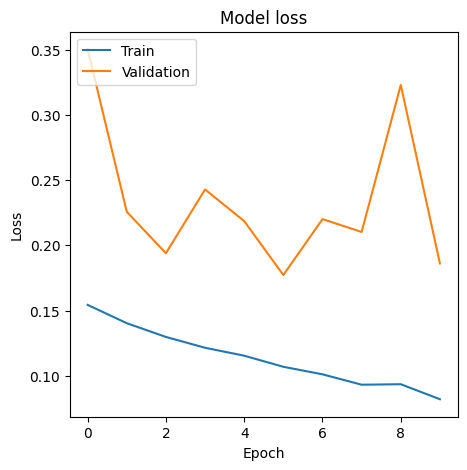

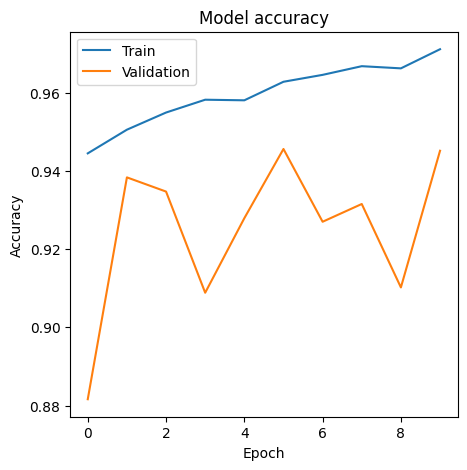

In [54]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()